In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node


No vtk
File does not exist: /shared/CSHL_data_processed/MD635/MD635_anchor.txt
File does not exist: /shared/CSHL_data_processed/MD635/MD635_sorted_filenames.txt
File does not exist: /shared/CSHL_data_processed/MD635/MD635_cropbox.txt
File does not exist: /shared/CSHL_data_processed/MD635/MD635_cropbox.txt


In [2]:
classifier_id = 30
warp_setting = 1

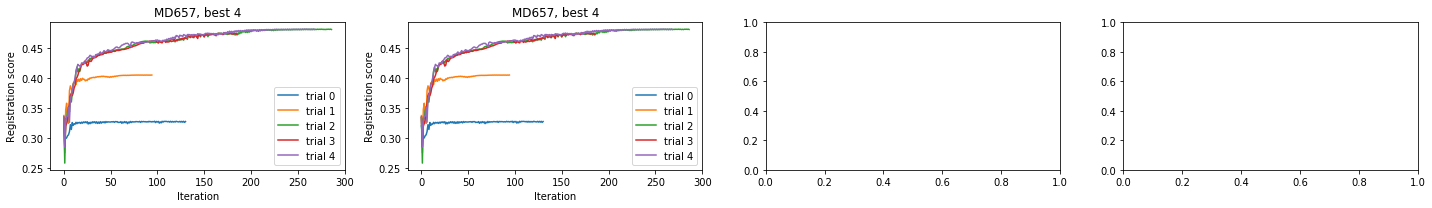

In [3]:
nc = 4
nr = int(np.ceil(len(['MD657', 'MD657'])/float(nc)))
fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(nc*5,nr*3));
axes = axes.flatten()

for i, stack in enumerate(sorted(['MD657', 'MD657'])):
    
    scores_all_trials = []
    for trial_idx in range(5):
        fp = DataManager.get_score_history_filepath(stack_m='atlasV3', stack_f=stack, warp_setting=warp_setting, 
                                               classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
                                                    downscale=32, trial_idx=trial_idx)
        scores = bp.unpack_ndarray_file(fp)
        scores_all_trials.append(scores)
        axes[i].plot(scores, label='trial '+ str(trial_idx));

    best_scores_each_trial = np.argsort([np.max(scores) for scores in scores_all_trials])
    if len(best_scores_each_trial) > 0:
        best_trial = best_scores_each_trial[-1]
#         scores = scores_all_trials[best_trial]        
#         axes[i].plot(scores, label='trial '+ str(best_trial));
        
    axes[i].set_title('%s, best %d' % (stack, best_trial));
    axes[i].set_xlabel('Iteration');
    axes[i].set_ylabel('Registration score');
    axes[i].legend();

plt.tight_layout()
plt.show()

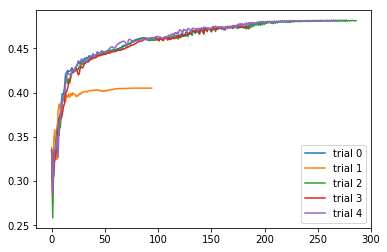

In [10]:
scores_all_trials = []

for trial_idx in range(5):
    try:
        fp = DataManager.get_score_history_filepath(stack_m='atlasV3', stack_f='MD657', warp_setting=warp_setting, 
                                               classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
                                                    downscale=32, trial_idx=trial_idx)
        scores = bp.unpack_ndarray_file(fp)
        scores_all_trials.append(scores)
        plt.plot(scores, label='trial '+ str(trial_idx));
    except Exception as e:
        sys.stderr.write('Scores for trial %d does not exist.\n' % (trial_idx))
        continue

plt.legend()
plt.show()

In [3]:
classifier_id = 30
warp_setting = 5

Scores for (outerContour, 0) does not exist.
Scores for (outerContour, 1) does not exist.
Scores for (outerContour, 2) does not exist.
Scores for (outerContour, 3) does not exist.
Scores for (outerContour, 4) does not exist.
Scores for (sp5, 0) does not exist.
Scores for (sp5, 1) does not exist.
Scores for (sp5, 2) does not exist.
Scores for (sp5, 3) does not exist.
Scores for (sp5, 4) does not exist.


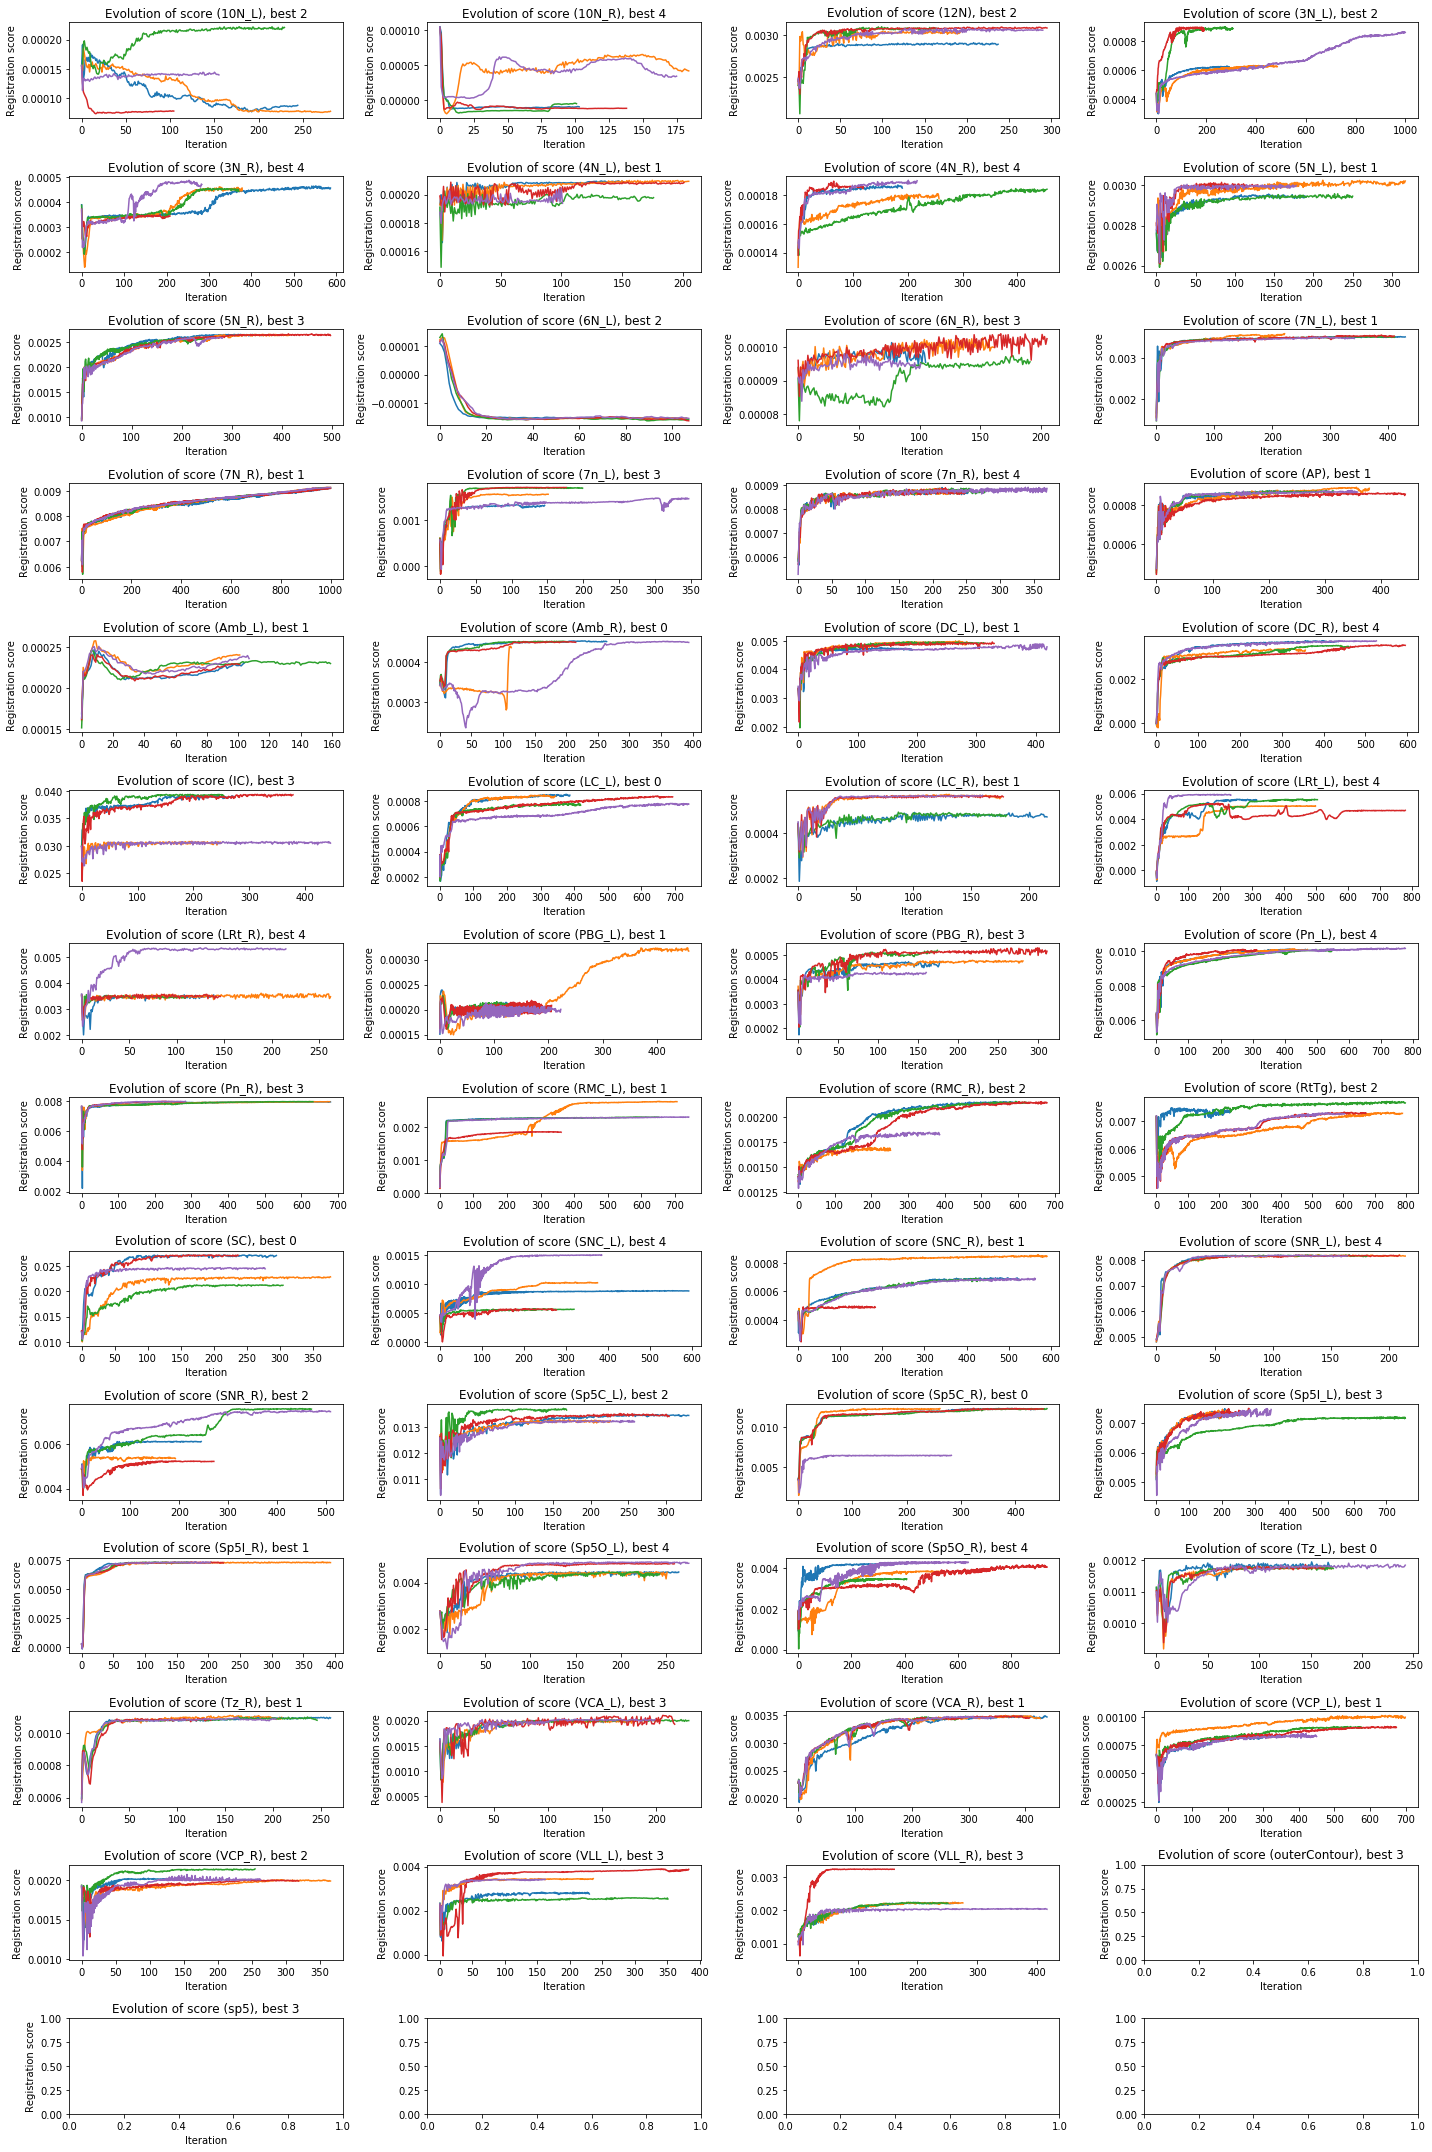

In [4]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(all_known_structures_sided)/4.)), ncols=4, figsize=(20,30));
axes = axes.flatten()

for i, structure in enumerate(sorted(all_known_structures_sided)):
    
    scores_all_trials = []
    
    for trial_idx in range(5):
        try:
            fp = DataManager.get_score_history_filepath(stack_m='atlasV3', stack_f='MD657', warp_setting=warp_setting, 
                                                   classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
                                                   param_suffix=structure, downscale=32, trial_idx=trial_idx)
            scores = bp.unpack_ndarray_file(fp)
            scores_all_trials.append(scores)
            axes[i].plot(scores, label='trial '+ str(trial_idx));
        except Exception as e:
            sys.stderr.write('Scores for (%s, %d) does not exist.\n' % (structure, trial_idx))
            continue

    best_scores_each_trial = np.argsort([np.max(scores) for scores in scores_all_trials])
    if len(best_scores_each_trial) > 0:
        best_trial = best_scores_each_trial[-1]
        scores = scores_all_trials[best_trial]       
#         axes[i].plot(scores, label='trial '+ str(best_trial));
        
    axes[i].set_title('Evolution of score (%s), best %d' % (structure, best_trial));
    axes[i].set_xlabel('Iteration');
    axes[i].set_ylabel('Registration score');

plt.tight_layout()
plt.show()

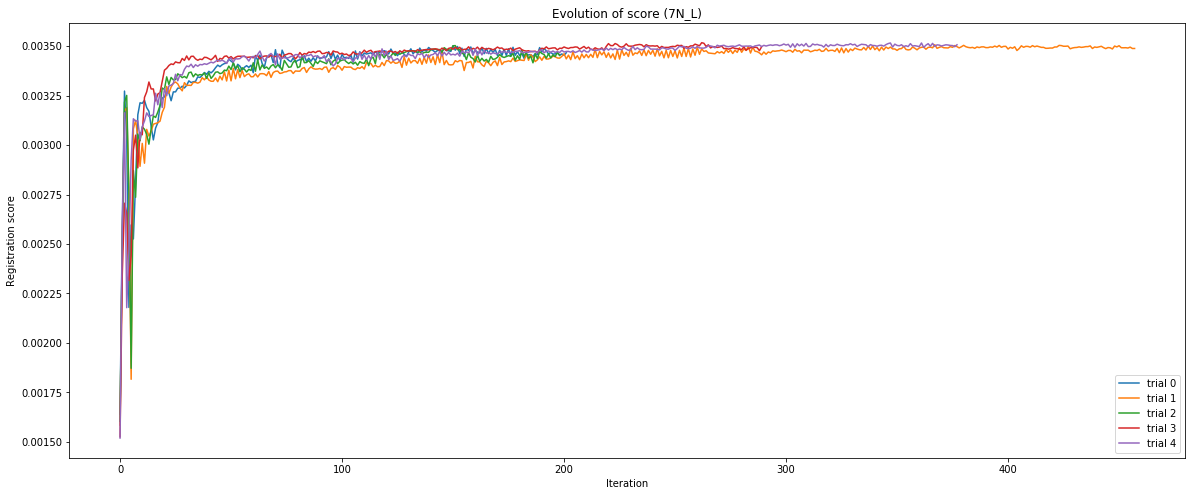

In [39]:
structure = '7N_L'
plt.figure(figsize=(20,8));
for trial_idx in range(5):
    try:
        fp = DataManager.get_score_history_filepath(stack_m='atlasV3', stack_f='MD657', warp_setting=warp_setting, 
                                               classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
                                               param_suffix=structure, downscale=32, trial_idx=trial_idx)
        scores = bp.unpack_ndarray_file(fp)

        plt.plot(scores, label='trial '+ str(trial_idx));
        plt.title('Evolution of score (%s)' % structure);
        plt.xlabel('Iteration');
        plt.ylabel('Registration score');
    except:
        sys.stderr.write('Scores for %s does not exist.\n' % structure)
        continue
plt.legend()
plt.show()

In [3]:
atlasAlignOptLogs_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_atlasAlignOptLogs_atlas'

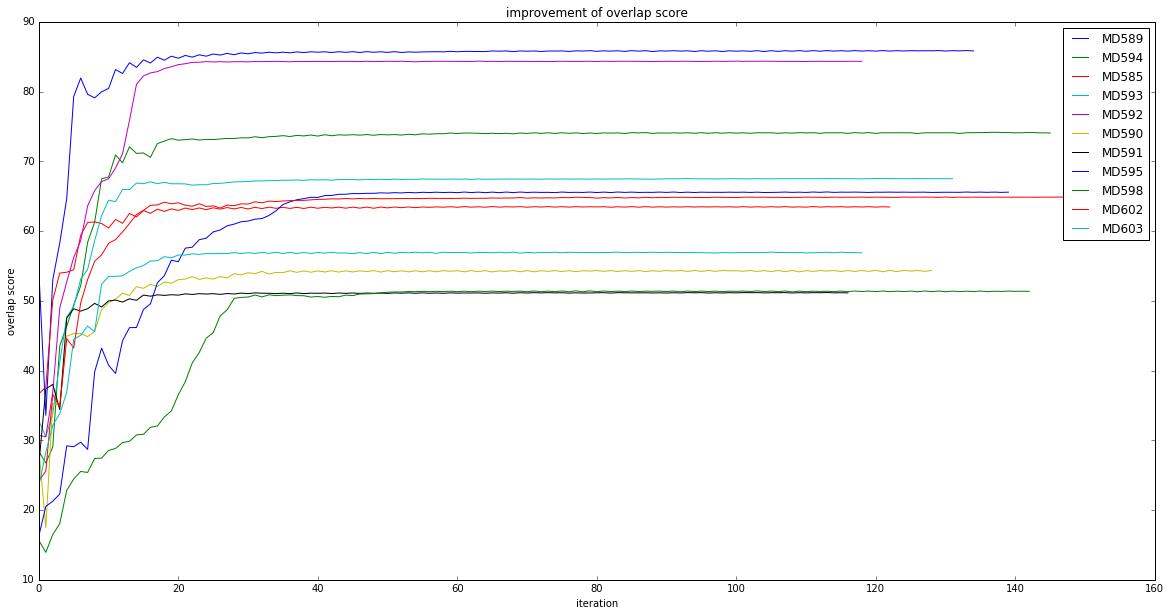

In [3]:
fig = plt.figure(figsize=(20,10));

for i, stack in enumerate(['MD589', 'MD594', 'MD585', 'MD593', 'MD592', 'MD590', 'MD591', 'MD595', 'MD598', 'MD602', 'MD603']):

    scores = np.load(atlasAlignOptLogs_dir + '/%(stack)s_scoreEvolutions.npy' % {'stack':stack})

    plt.plot(scores, label=stack);
    plt.title('improvement of overlap score');
    plt.xlabel('iteration');
    plt.ylabel('overlap score');

plt.legend()    
plt.show();

In [4]:
volume_landmark_names_unsided = ['12N', '5N', '6N', '7N', '7n', 'AP', 'Amb', 'LC',
                                 'LRt', 'Pn', 'R', 'RtTg', 'Tz', 'VLL', 'sp5']
linear_landmark_names_unsided = ['outerContour']

labels_unsided = volume_landmark_names_unsided + linear_landmark_names_unsided
labels_unsided_indices = dict((j, i+1) for i, j in enumerate(labels_unsided))  # BackG always 0

labelMap_unsidedToSided = {'12N': ['12N'],
                            '5N': ['5N_L', '5N_R'],
                            '6N': ['6N_L', '6N_R'],
                            '7N': ['7N_L', '7N_R'],
                            '7n': ['7n_L', '7n_R'],
                            'AP': ['AP'],
                            'Amb': ['Amb_L', 'Amb_R'],
                            'LC': ['LC_L', 'LC_R'],
                            'LRt': ['LRt_L', 'LRt_R'],
                            'Pn': ['Pn_L', 'Pn_R'],
                            'R': ['R_L', 'R_R'],
                            'RtTg': ['RtTg'],
                            'Tz': ['Tz_L', 'Tz_R'],
                            'VLL': ['VLL_L', 'VLL_R'],
                            'sp5': ['sp5'],
                           'outerContour': ['outerContour']}

labelMap_sidedToUnsided = {n: nu for nu, ns in labelMap_unsidedToSided.iteritems() for n in ns}

from itertools import chain
labels_sided = list(chain(*(labelMap_unsidedToSided[name_u] for name_u in labels_unsided)))
labels_sided_indices = dict((j, i+1) for i, j in enumerate(labels_sided)) # BackG always 0
labels_sided_indices['BackG'] = 0

In [5]:
import os

In [6]:
atlasAlignOptLogs_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_atlasAlignOptLogs_atlas_affine'

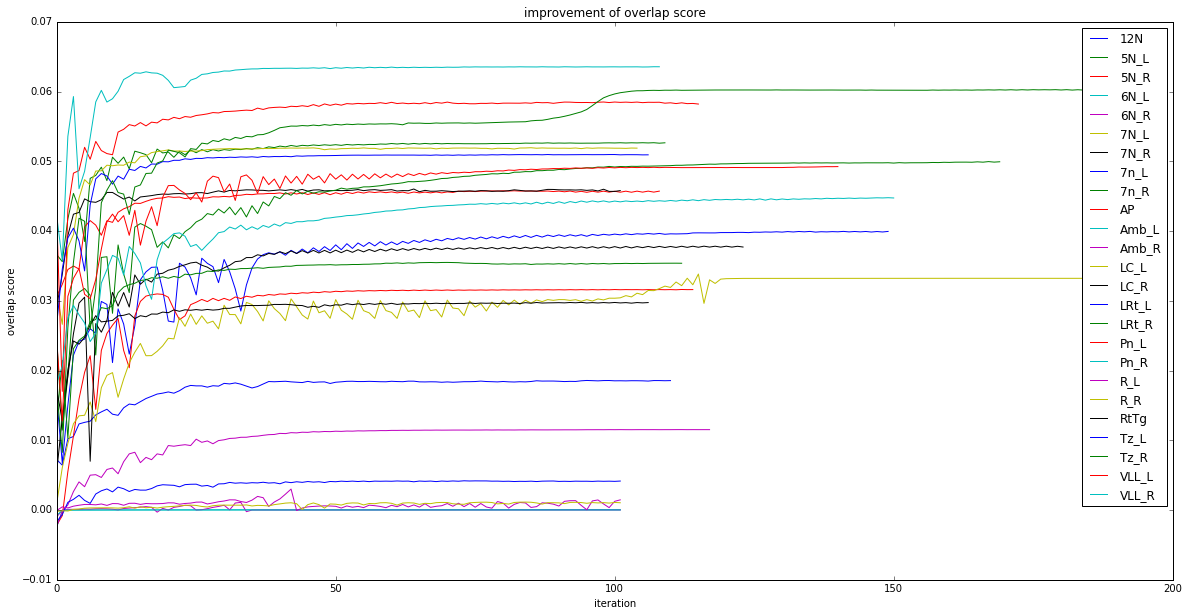

In [25]:
fig = plt.figure(figsize=(20,10));

# for i, stack in enumerate(['MD589', 'MD594', 'MD585', 'MD593', 'MD592', 'MD590', 'MD591', 'MD595', 'MD598', 'MD602', 'MD603']):
for i, stack in enumerate(['MD603']):

    for name_s in labels_sided:
    
        tf_fn = atlasAlignOptLogs_dir + '/%(stack)s/%(stack)s_%(name)s_scoreEvolutions_transformUponAffineProjection.npy' % {'stack':stack, 'name':name_s}
    
        if not os.path.exists(tf_fn):
            continue
        
        scores = np.load(tf_fn)

        plt.plot(scores, label=name_s);
        plt.title('improvement of overlap score');
        plt.xlabel('iteration');
        plt.ylabel('overlap score');

    plt.legend()
    plt.show();

In [ ]:
fig, axes = plt.subplots(9, 1, figsize=(20, 5*9), squeeze=True, sharex=True)

for i, stack in enumerate(['MD594', 'MD585', 'MD593', 'MD592', 'MD590', 'MD591', 'MD595', 'MD598', 'MD602']):

# stack = 'MD590'

    scores = np.load(atlasAlignOptLogs_dir + '/%(stack)s_scoreEvolutions.npy' % {'stack':stack})

    axes[i].plot(scores[:]);
    axes[i].set_title('improvement of overlap score %s' % stack);
#     axes[i].set_xlabel('iteration');
    axes[i].set_ylabel('overlap score');

plt.show();

In [ ]:
history_len = 50

ds = []
for i in range(len(scores)):
    s = scores[i]
    d = np.abs(np.mean(scores[i-history_len:i]) - np.mean(scores[i-2*history_len:i-history_len]))
    ds.append(d)
    if d < .1:
        print 'break'
        break
print i

In [ ]:
plt.plot(ds);
plt.title('changes in score');
plt.xlabel('iteration');
plt.ylabel('changes');
plt.show();